In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
# from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model

In [4]:
#Load dataset 

data_h = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv", header=0)

data_h

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='output', ylabel='count'>

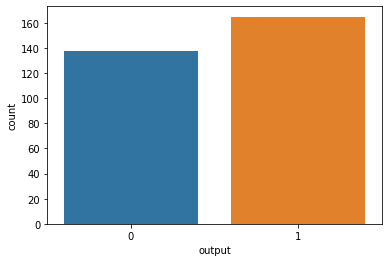

In [13]:
#Depicting the count of patients who had a heart atrack (1) vs those who didn't (0) 
sns.countplot(data_h['output'], label="Count")

In [35]:
#Predicting heart attack probabilities

prediction_var =['trtbps','chol','fbs','restecg','thall', 'exng', 'cp','slp',]

In [36]:
#Setting 30% of dataset to test the model and the rest to train the model

train, test= train_test_split(data_h, test_size = 0.3)
print(train.shape)
print(test.shape)

(212, 14)
(91, 14)


In [37]:
#TRAINING SET
train_X = train[prediction_var]
train_Y = train.output

#TEST SET
test_X = test[prediction_var]
test_Y = test.output

In [41]:
#Random Forest Classifier

model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(prediction)
metrics.accuracy_score(prediction, test_Y)

[1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1]


0.7692307692307693

In [50]:
#Support Vector Machine

model = svm.SVC()
model.fit(train_X, train_Y)
prediction = model.predict(test_X)
print(prediction)
metrics.accuracy_score(prediction, test_Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


0.5494505494505495